In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read the dataset

In [2]:
data = pd.read_csv('FinalFlipkartData.csv')

In [3]:
data.columns

Index(['Brand', 'Title', 'Product Type', 'Who', 'Price', 'MRP', 'Savings',
       'Discount %', 'Rating', 'Total Ratings Given', 'Total Reviews Given'],
      dtype='object')

### We can see space is present in dataset names so lets remove space before proceeding

In [4]:
data.columns = data.columns.str.replace(' ', '_')

In [5]:
data.columns

Index(['Brand', 'Title', 'Product_Type', 'Who', 'Price', 'MRP', 'Savings',
       'Discount_%', 'Rating', 'Total_Ratings_Given', 'Total_Reviews_Given'],
      dtype='object')

In [6]:
data.head()

,Brand,Title,Product_Type,Who,Price,MRP,Savings,Discount_%,Rating,Total_Ratings_Given,Total_Reviews_Given
0,NIKE,NIKE Nike Revolution 4 Men'...,shoes,men,2216,3693.33,1477,40.0,4.2,54006,7049
1,Layasa,Layasa sports shoes for men...,shoes,men,379,997.37,618,62.0,4.0,13792,1677
2,YONEX,YONEX Tokyo 2 Badminton Sho...,shoes,men,1919,2998.44,1079,36.0,4.3,1298,172
3,ADIDAS,ADIDAS Clear Factor M Runni...,shoes,men,1499,2498.33,999,40.0,4.2,3904,578
4,PUMA,PUMA Space Runner Running S...,shoes,men,2050,3474.58,1424,41.0,4.2,194,36


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639 entries, 0 to 1638
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                1639 non-null   object 
 1   Title                1639 non-null   object 
 2   Product_Type         1639 non-null   object 
 3   Who                  1639 non-null   object 
 4   Price                1639 non-null   int64  
 5   MRP                  1639 non-null   float64
 6   Savings              1639 non-null   int64  
 7   Discount_%           1639 non-null   float64
 8   Rating               1639 non-null   float64
 9   Total_Ratings_Given  1639 non-null   int64  
 10  Total_Reviews_Given  1639 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 141.0+ KB


## There are not any NAN values are present in DataFrame

In [51]:
data.describe()

,Price,MRP,Savings,Discount_%,Rating,Total_Ratings_Given,Total_Reviews_Given
count,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000
mean,900.738865,1716.956882,815.811470,45.569860,3.985784,1730.180598,224.970714
std,966.610384,1476.457547,778.801047,23.055618,0.348202,8655.260853,1125.891795
min,149.000000,219.000000,0.000000,0.000000,3.000000,1.000000,1.000000
25%,379.000000,891.070000,310.000000,32.000000,3.800000,23.000000,3.000000
50%,599.000000,1198.280000,598.000000,50.000000,4.000000,109.000000,13.000000
75%,999.000000,1986.360000,1085.500000,62.000000,4.200000,496.500000,61.000000
max,8495.000000,10759.180000,5487.000000,89.000000,5.000000,167992.000000,20241.000000


In [8]:
data.Brand.nunique()

377

## Total 337 Brands are present in this Dataset 

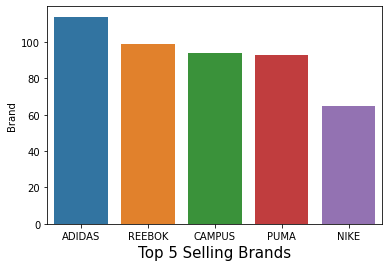

In [9]:
sns.barplot(x = data.Brand.value_counts().head().index,y = data.Brand.value_counts().head())
plt.xlabel('Top 5 Selling Brands',fontsize=15)
plt.show()

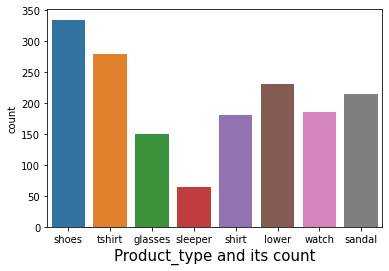

In [10]:
sns.countplot(x = data['Product_Type'])
plt.xlabel('Product_type and its count',fontsize=15)
plt.show()

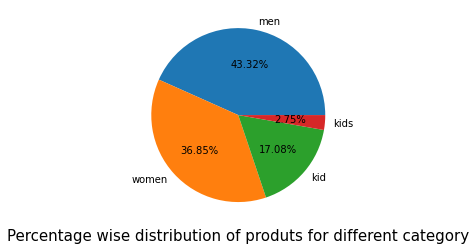

In [11]:
plt.pie(data.Who.value_counts(),autopct='%0.2f%%',labels=data.Who.value_counts().index)
plt.xlabel('Percentage wise distribution of produts for different category',fontsize=15)
plt.show()

## We can see that there are more percentage of Men products than Women Products

C:\Users\SANIKA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\SANIKA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


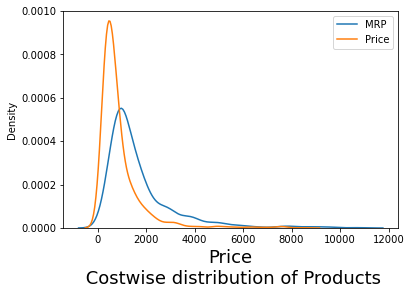

In [12]:
sns.distplot(data[['MRP']],hist=False,label='MRP')
sns.distplot(data[['Price']],hist=False,label='Price')
plt.xlabel('Price\n Costwise distribution of Products',fontsize=18)
plt.legend()
plt.show()

## We can see there are more products in range 0-1500

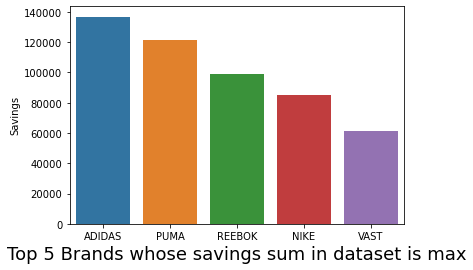

In [13]:
sns.barplot(x=data.groupby('Brand')['Savings'].sum().nlargest().index,y=data.groupby('Brand')['Savings'].sum().nlargest())
plt.xlabel('Top 5 Brands whose savings sum in dataset is max',fontsize=18)
plt.show()

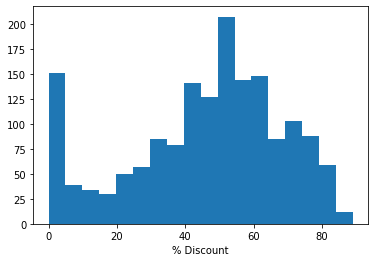

In [14]:
plt.hist(data['Discount_%'],bins=18)
plt.xlabel('% Discount')
plt.show()


## We can see there is more number of Discount given which is in range 40%-60%

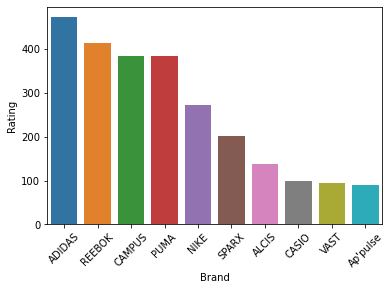

In [15]:
sns.barplot(x=data.groupby('Brand')['Rating'].sum().nlargest(10).index,y=data.groupby('Brand')['Rating'].sum().nlargest(10))
plt.xticks(rotation=45)
plt.show()

## Top 10 Brands whos sum of rating is maximum 

In [16]:
print(list(data.loc[data.Total_Ratings_Given.nlargest(10).index].Brand.values))

['LOIS', 'BEEROCK', 'Density', 'CAMPUS', 'SPARX', 'MILESWALKER', 'NIKE', 'NIKE', 'MODEVE', 'aadi']


## Top 10 Brands according to Sum of Ratings given

<AxesSubplot:>

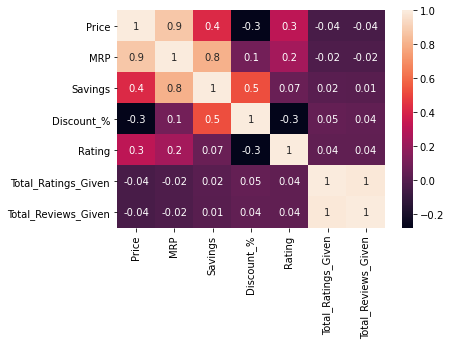

In [17]:
sns.heatmap(data.corr(),annot=True,fmt='0.1g')

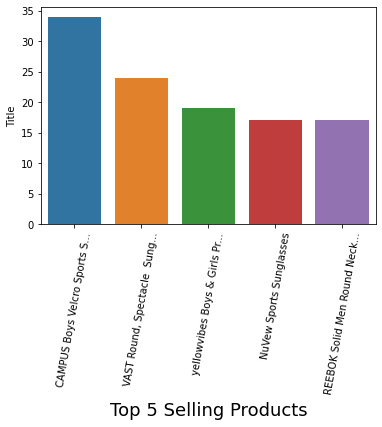

In [18]:
sns.barplot(x=data.Title.value_counts().head().index,y=data.Title.value_counts().head())
plt.xticks(rotation=80)
plt.xlabel('Top 5 Selling Products',fontsize=(18))
plt.show()

In [19]:
data[data.Price==data.Price.max()]

,Brand,Title,Product_Type,Who,Price,MRP,Savings,Discount_%,Rating,Total_Ratings_Given,Total_Reviews_Given
1342,CASIO,CASIO BX067 BABY-G Tandem S...,watch,women,8495,8495.0,0,0.0,3.7,7,1


## This is Max priced product

In [21]:
data.columns

Index(['Brand', 'Title', 'Product_Type', 'Who', 'Price', 'MRP', 'Savings',
       'Discount_%', 'Rating', 'Total_Ratings_Given', 'Total_Reviews_Given'],
      dtype='object')

<AxesSubplot:xlabel='Rating'>

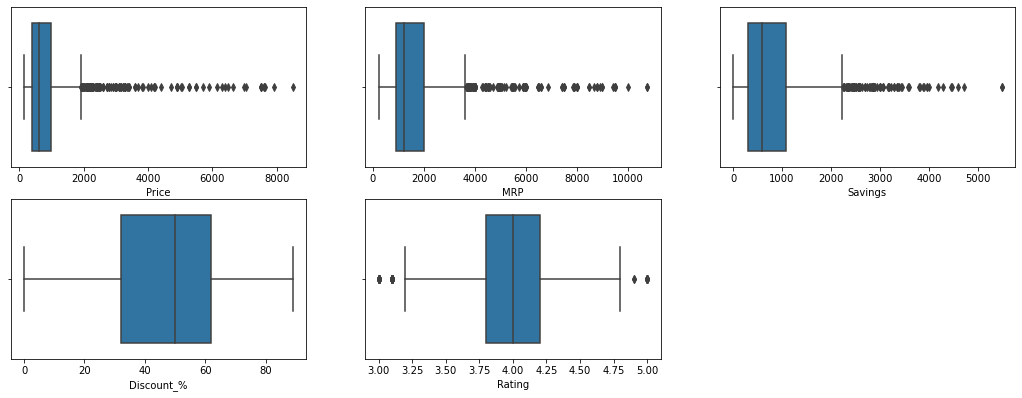

In [53]:
plt.figure(figsize=(18,10))
plt.subplot(3,3,1)
sns.boxplot(x=data.Price)
plt.subplot(3,3,2)
sns.boxplot(x=data.MRP)
plt.subplot(3,3,3)
sns.boxplot(x=data.Savings)
plt.subplot(3,3,4)
sns.boxplot(x=data['Discount_%'])
plt.subplot(3,3,5)
sns.boxplot(x=data.Rating)